In [1]:
import pandas as pd

df_full = pd.read_csv('./data/ad_placement/census-income.csv')
                 
df_full.columns = ['AAGE','ACLSWKR','ADTIND','ADTOCC','AHGA','AHRSPAY','AHSCOL','AMARITL',
                                                                              'AMJIND','AMJOCC','ARACE','AREORGN','ASEX','AUNMEM','AUNTYPE','AWKSTAT','CAPGAIN',
                                                                              'CAPLOSS','DIVVAL','FILESTAT','GRINREG','GRINST','HHDFMX','HHDREL', 'MARSUPWT',
                                                                              'MIGMTR1','MIGMTR3','MIGMTR4','MIGSAME','MIGSUN','NOEMP','PARENT','PEFNTVTY',
                                                                              'PEMNTVTY','PENATVTY','PRCITSHP','SEOTR','VETQVA','VETYN','WKSWORK', 'YEAR', 'INCOME']

df_full.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,INCOME
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


In [42]:
df_reduced=df_full[['AAGE','ACLSWKR','ASEX','AHGA','AHRSPAY','AMARITL','CAPGAIN',
          'CAPLOSS','DIVVAL','NOEMP','SEOTR','WKSWORK', 'INCOME']]

#df_reduced.AHGA.value_counts()
#df_reduced.loc[df_reduced.AHGA.isin(['7th and 8th grade','10th grade','11th grade','5th or 6th grade'])]['AHGA']
#df_reduced[df_reduced.AHGA == 'Less than 1st grade']['AHGA'] = 'No Degree'

In [43]:
df_dummies=pd.get_dummies(df_reduced)
df_continuous=df_reduced[['AAGE','AHRSPAY','CAPGAIN','CAPLOSS','DIVVAL','NOEMP','SEOTR','WKSWORK']]

In [44]:
print df_full.shape
print df_reduced.shape
print df_dummies.shape
print df_continuous.shape

(199522, 42)
(199522, 13)
(199522, 45)
(199522, 8)


In [45]:
from sklearn import cluster
from sklearn import preprocessing

df_scaled=preprocessing.scale(df_continuous)

k_means = cluster.KMeans(n_clusters=5)
k_means.fit(df_scaled)
clusters=k_means.predict(df_scaled)

y=pd.DataFrame(clusters)
y['cluster'] = y[0L]
results = pd.concat([df_continuous, y], axis=1)
print results.head()

   AAGE  AHRSPAY  CAPGAIN  CAPLOSS  DIVVAL  NOEMP  SEOTR  WKSWORK  0  cluster
0    58        0        0        0       0      1      0       52  0        0
1    18        0        0        0       0      0      0        0  1        1
2     9        0        0        0       0      0      0        0  1        1
3    10        0        0        0       0      0      0        0  1        1
4    48     1200        0        0       0      1      2       52  4        4


In [47]:
results.groupby(['cluster']).mean()

,AAGE,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,WKSWORK,0
cluster,,,,,,,,,
0,40.018467,115.969452,457.338132,0.389822,210.965420,3.958595,0.001384,47.447419,0
1,30.037439,2.942956,61.596921,0.224253,160.395552,0.108833,0.000900,0.884374,1
2,43.987352,79.359157,0.000000,1944.849539,729.440580,3.468775,0.275099,41.678524,2
3,46.844388,24.706633,99630.780612,0.000000,5346.431122,3.331633,0.265306,47.426020,3
4,34.450830,96.127270,389.501138,0.668832,127.965129,3.730690,1.869065,43.903770,4


In [48]:
results.groupby(['cluster']).count()

,AAGE,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,WKSWORK,0
cluster,,,,,,,,,
0,75160,75160,75160,75160,75160,75160,75160,75160,75160
1,102166,102166,102166,102166,102166,102166,102166,102166,102166
2,3795,3795,3795,3795,3795,3795,3795,3795,3795
3,392,392,392,392,392,392,392,392,392
4,18009,18009,18009,18009,18009,18009,18009,18009,18009


In [73]:
from sklearn import cluster
from sklearn import preprocessing

df_scaled=preprocessing.scale(df_dummies)

k_means = cluster.KMeans(n_clusters=4)
k_means.fit(df_scaled)
clusters=k_means.predict(df_scaled)

y['cluster']=pd.DataFrame(clusters)
results = pd.concat([df_dummies, y], axis=1)
#print results.head()

In [74]:
output_count=results.groupby(['cluster']).count()
output_mean=results.groupby(['cluster']).mean()

In [75]:
output_count.to_excel("output_counts.xlsx")
output_mean.to_excel("output_mean.xlsx")
#results.groupby(['cluster']).count()
#results.columns

In [51]:
results.groupby(['cluster']).mean()

,AAGE,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,WKSWORK,ACLSWKR_ Federal government,ACLSWKR_ Local government,...,AMARITL_ Divorced,AMARITL_ Married-A F spouse present,AMARITL_ Married-civilian spouse present,AMARITL_ Married-spouse absent,AMARITL_ Never married,AMARITL_ Separated,AMARITL_ Widowed,INCOME_ - 50000.,INCOME_ 50000+.,0
cluster,,,,,,,,,,,,,,,,,,,,,
0,37.935948,115.894292,704.243848,62.079518,186.042228,3.731578,0.349704,45.430116,0.033120,0.0,...,0.099429,0.004686,0.582967,0.010654,0.264721,0.024448,0.013095,0.888129,0.111871,0.854436
1,60.995267,0.517452,203.829045,25.565125,414.370649,0.321108,0.011821,2.427715,0.000558,0.0,...,0.074421,0.005534,0.615807,0.012501,0.043352,0.027938,0.220448,0.985291,0.014709,0.965678
2,9.687773,0.488577,4.144182,2.028566,6.619985,0.148801,0.010189,0.698012,0.000183,0.0,...,0.000100,0.000000,0.000167,0.000000,0.999733,0.000000,0.000000,0.999850,0.000150,0.998816
3,45.937614,0.000000,3956.241935,122.742848,1300.558734,1.866707,0.193244,48.559343,0.000000,0.0,...,0.056604,0.000609,0.805539,0.005173,0.108338,0.009130,0.014607,0.648509,0.351491,0.685027
4,41.905062,114.612795,464.841984,57.547790,183.784558,4.662770,0.352775,45.860868,0.000000,1.0,...,0.099306,0.003340,0.682040,0.007194,0.165211,0.018628,0.024281,0.891187,0.108813,0.829394


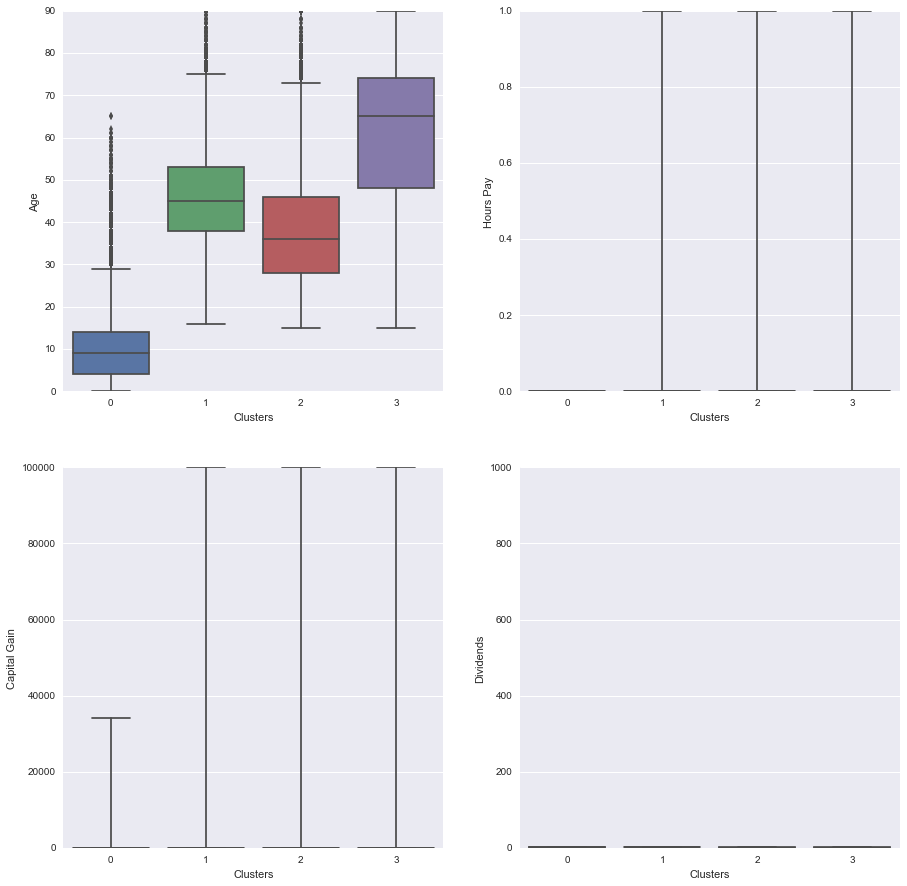

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

plt.figure(figsize=(15,15))

ax1 = plt.subplot(221)
sns.boxplot(results['AAGE'], groupby=results['cluster'])
plt.xlabel("Clusters")
plt.ylabel("Age")

ax2 = plt.subplot(222)
sns.boxplot(results['AMARITL_ Married-spouse absent'], groupby=results['cluster'])
plt.xlabel("Clusters")
plt.ylabel("Hours Pay")

ax3 = plt.subplot(223)
sns.boxplot(results['CAPGAIN'], groupby=results['cluster'])
plt.xlabel("Clusters")
plt.ylabel("Capital Gain")

ax4 = plt.subplot(224)
sns.boxplot(results['ASEX_ Male'], groupby=results['cluster'])
plt.ylim(0, 1000)
plt.xlabel("Clusters")
plt.ylabel("Dividends")

In [71]:
results['cluster'].value_counts()

3    87039
1    59765
0    40310
2    12408
Name: cluster, dtype: int64

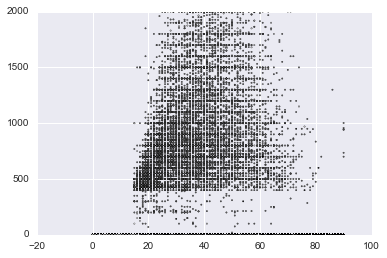

In [83]:
pyplot.scatter(results['AAGE'], results['AHRSPAY'], c=results['cluster'],s=2)
pyplot.ylim(0,2000)
pyplot.show()

In [87]:
results['AHRSPAY'].value_counts()

0       188218
500        734
600        546
700        534
800        507
1000       386
425        376
900        336
550        280
1200       256
1100       235
650        229
450        222
1500       221
750        202
1300       198
850        167
525        147
1600       136
1400       132
1800       127
400        125
1700       116
2000       108
475        105
435         98
625         91
950         84
1050        76
575         73
         ...  
807          1
2470         1
458          1
1446         1
1190         1
2377         1
586          1
4900         1
1266         1
1394         1
294          1
1829         1
1191         1
1353         1
552          1
626          1
742          1
1224         1
1960         1
2291         1
2163         1
1096         1
1638         1
1905         1
487          1
743          1
584          1
170          1
1265         1
2142         1
Name: AHRSPAY, dtype: int64

In [47]:
results['cluster']=results.cluster.astype(str)
results.dtypes

AAGE                                              int64
ADTIND                                            int64
ADTOCC                                            int64
AHRSPAY                                           int64
CAPGAIN                                           int64
CAPLOSS                                           int64
DIVVAL                                            int64
NOEMP                                             int64
SEOTR                                             int64
VETYN                                             int64
WKSWORK                                           int64
YEAR                                              int64
ACLSWKR_ Federal government                     float64
ACLSWKR_ Local government                       float64
ACLSWKR_ Never worked                           float64
ACLSWKR_ Not in universe                        float64
ACLSWKR_ Private                                float64
ACLSWKR_ Self-employed-incorporated             

In [89]:
df_reduced['cluster'] = results['cluster']

c:\Users\DES368\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
